In [1]:
# usual imports 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# scikit-learn and category encoders
from sklearn.model_selection import train_test_split
#from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

EDA OF LOAN DATA

UPLOADING THE DATA

In [2]:
loan = pd.read_csv("./archive(1)/loan.csv")

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan["loan_status"]

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [6]:
loan["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [7]:
loan['loan_status'].value_counts(normalize=True)

Fully Paid     0.829620
Charged Off    0.141677
Current        0.028703
Name: loan_status, dtype: float64

DROP ALL COLUMNS WHICH HAVE NO DATA

In [8]:
loan_new = loan.dropna(axis = 1, how = 'all')

In [9]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [10]:
loan_new['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [11]:
loan_new['status_of_loans'] = loan_new['loan_status'].map({"Fully Paid":0, "Current":1, "Charged Off":2})

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
loan_new['status_of_loans'].head(20)

0     0
1     2
2     0
3     0
4     1
5     0
6     0
7     0
8     2
9     2
10    0
11    0
12    2
13    0
14    2
15    0
16    0
17    0
18    0
19    0
Name: status_of_loans, dtype: int64

Status_of_Loan TO BE PREDICTED 

In [13]:
loan_new['loan_status'].head(20)

0      Fully Paid
1     Charged Off
2      Fully Paid
3      Fully Paid
4         Current
5      Fully Paid
6      Fully Paid
7      Fully Paid
8     Charged Off
9     Charged Off
10     Fully Paid
11     Fully Paid
12    Charged Off
13     Fully Paid
14    Charged Off
15     Fully Paid
16     Fully Paid
17     Fully Paid
18     Fully Paid
19     Fully Paid
Name: loan_status, dtype: object

In [14]:
loan_new['grade_of_loans'] = loan_new['grade'].map({"A":7, "B":6, "C":5, "D":4, "E":3, "F":2, "G":1})

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
loan_new['grade_of_loans']

0        6
1        5
2        5
3        5
4        6
        ..
39712    7
39713    5
39714    7
39715    7
39716    3
Name: grade_of_loans, Length: 39717, dtype: int64

In [16]:
loan_new['grade']

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

In [17]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [18]:
loan_new['grade'].value_counts(normalize=True)

B    0.302641
A    0.253921
C    0.203893
D    0.133620
E    0.071556
F    0.026412
G    0.007956
Name: grade, dtype: float64

GRADE IS A CATEGORICAL VARIABLE TO BE ONEHOTENCODED

In [19]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 59 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [22]:
loan_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [23]:
loan_new.to_csv("./archive(1)/loan_new.csv")

VARIABLES TO DROP FROM THE FILE FOR DATA CLEANING

In [24]:
colsToDrop = ["id", "member_id", "funded_amnt", "emp_title", "pymnt_plan", "url", "desc", 
 "title", "zip_code", "delinq_2yrs", 
 "mths_since_last_record", "revol_bal", "initial_list_status", 
 "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv",
 "total_rec_prncp", "total_rec_int", "total_rec_late_fee", 
 "collection_recovery_fee", "last_pymnt_d", 
 "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", 
 "collections_12_mths_ex_med", "policy_code", "acc_now_delinq",
 "chargeoff_within_12_mths", "tax_liens", 
 "application_type", "pub_rec_bankruptcies", "addr_state"]

In [25]:
colsToDrop

['id',
 'member_id',
 'funded_amnt',
 'emp_title',
 'pymnt_plan',
 'url',
 'desc',
 'title',
 'zip_code',
 'delinq_2yrs',
 'mths_since_last_record',
 'revol_bal',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'tax_liens',
 'application_type',
 'pub_rec_bankruptcies',
 'addr_state']

In [26]:
loan_new.drop(colsToDrop, axis=1, inplace=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [28]:
loan_new.to_csv("./archive(1)/loan_new_updated.csv")

In [29]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [30]:
NewLoans = loan_new[['loan_amnt', 'term']]

In [31]:
loan_new['life'] = loan_new['term'].str.extract("(\d*\.?\d+)", expand=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
loan_new['life']

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: life, Length: 39717, dtype: object

In [33]:
loan_new['life_new'] = pd.to_numeric(loan_new['life'], errors='coerce')

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [35]:
loan_new.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,recoveries,delinq_amnt,status_of_loans,grade_of_loans,life,life_new
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,NaN,3,0,83.70%,9,0.00,0,0,6,36,36
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,NaN,3,0,9.40%,4,117.08,0,2,5,60,60
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,NaN,2,0,98.50%,10,0.00,0,0,5,36,36
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,35.0,10,0,21%,37,0.00,0,0,5,36,36
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,38.0,15,0,53.90%,38,0.00,0,1,6,60,60


In [36]:
loan_new['interest_rate'] = loan_new['int_rate'].str.extract("(\d*\.?\d+)", expand=True)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
loan_new['interest_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: interest_rate, Length: 39717, dtype: object

In [38]:
loan_new['interest_rate_new'] = pd.to_numeric(loan_new['interest_rate'], errors='coerce')

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
loan_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt_inv         39717 non-null  float64
 2   term                    39717 non-null  object 
 3   int_rate                39717 non-null  object 
 4   installment             39717 non-null  float64
 5   grade                   39717 non-null  object 
 6   sub_grade               39717 non-null  object 
 7   emp_length              38642 non-null  object 
 8   home_ownership          39717 non-null  object 
 9   annual_inc              39717 non-null  float64
 10  verification_status     39717 non-null  object 
 11  issue_d                 39717 non-null  object 
 12  loan_status             39717 non-null  object 
 13  purpose                 39717 non-null  object 
 14  dti                     39717 non-null

In [40]:
loan_subset = loan_new[loan_new['status_of_loans'] > 0]

In [41]:
loan_subset.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_acc,recoveries,delinq_amnt,status_of_loans,grade_of_loans,life,life_new,interest_rate,interest_rate_new
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,NaN,3,0,9.40%,4,117.08,0,2,5,60,60,15.27,15.27
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,Jan-96,0,38.0,15,0,53.90%,38,0.00,0,1,6,60,60,12.69,12.69
8,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55,Apr-04,2,NaN,11,0,32.60%,13,189.06,0,2,2,60,60,21.28,21.28
9,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08,Sep-04,0,NaN,2,0,36.50%,3,269.29,0,2,6,60,60,12.69,12.69
12,9000,9000.0,36 months,13.49%,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,10.08,Apr-04,1,NaN,4,0,91.70%,9,444.30,0,2,5,36,36,13.49,13.49


In [42]:
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6767 entries, 1 to 39688
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               6767 non-null   int64  
 1   funded_amnt_inv         6767 non-null   float64
 2   term                    6767 non-null   object 
 3   int_rate                6767 non-null   object 
 4   installment             6767 non-null   float64
 5   grade                   6767 non-null   object 
 6   sub_grade               6767 non-null   object 
 7   emp_length              6497 non-null   object 
 8   home_ownership          6767 non-null   object 
 9   annual_inc              6767 non-null   float64
 10  verification_status     6767 non-null   object 
 11  issue_d                 6767 non-null   object 
 12  loan_status             6767 non-null   object 
 13  purpose                 6767 non-null   object 
 14  dti                     6767 non-null  

In [43]:
X = loan_subset[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'grade_of_loans', 'annual_inc', 'recoveries', 'sub_grade']]

In [44]:
X.to_csv("./archive(1)/X.csv")

In [45]:
X.head()

,loan_amnt,life_new,interest_rate_new,installment,grade_of_loans,annual_inc,recoveries,sub_grade
1,2500,60,15.27,59.83,5,30000.0,117.08,C4
4,3000,60,12.69,67.79,6,80000.0,0.00,B5
8,5600,60,21.28,152.39,2,40000.0,189.06,F2
9,5375,60,12.69,121.45,6,15000.0,269.29,B5
12,9000,36,13.49,305.38,5,30000.0,444.30,C1


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
X.shape

(6767, 8)

In [48]:
y = loan_subset['status_of_loans']

In [49]:
y.to_csv("./archive(1)/y.csv")

## MODELING A CATEGORICAL VARIABLE AND CONCATING THE TWO DATAFRAMES TOGETHER

In [50]:
X11 = loan_subset[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'grade', 'annual_inc','recoveries', 'sub_grade' ]]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X11, y, stratify =y, random_state = 24)

In [52]:
X_train

,loan_amnt,life_new,interest_rate_new,installment,grade,annual_inc,recoveries,sub_grade
9202,29100,60,13.99,450.73,C,52872.0,0.00,C3
13859,2350,36,12.99,79.17,C,36000.0,96.20,C1
35102,15250,36,12.53,510.37,B,52000.0,0.00,B5
11356,6000,60,10.99,130.43,B,53640.0,0.00,B3
15981,6000,60,10.37,128.58,B,24000.0,0.00,B3
...,...,...,...,...,...,...,...,...
7565,10000,36,11.71,330.76,B,48000.0,0.00,B3
23593,2500,60,12.98,56.86,C,70000.0,109.22,C3
31230,20000,36,11.36,658.23,B,65000.0,0.00,B5
14669,5000,60,17.99,126.94,E,40000.0,0.00,E1


In [53]:
X_train_s = X_train[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc', 'recoveries']]

In [54]:
X_train_s

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
9202,29100,60,13.99,450.73,52872.0,0.00
13859,2350,36,12.99,79.17,36000.0,96.20
35102,15250,36,12.53,510.37,52000.0,0.00
11356,6000,60,10.99,130.43,53640.0,0.00
15981,6000,60,10.37,128.58,24000.0,0.00
...,...,...,...,...,...,...
7565,10000,36,11.71,330.76,48000.0,0.00
23593,2500,60,12.98,56.86,70000.0,109.22
31230,20000,36,11.36,658.23,65000.0,0.00
14669,5000,60,17.99,126.94,40000.0,0.00


In [55]:
X_test_s = X_test[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc', 'recoveries']]

In [56]:
X_test_s

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
35500,18000,36,12.18,599.40,44000.0,5989.52
32760,7750,36,17.04,276.48,13920.0,409.57
12257,16000,60,10.99,347.80,69996.0,0.00
14470,24000,60,18.39,614.55,85000.0,0.00
21869,7000,36,9.25,223.42,84000.0,272.12
...,...,...,...,...,...,...
34793,25000,36,18.09,904.88,70000.0,13.13
24001,24250,60,18.17,453.02,50004.0,11.87
26093,12000,36,7.51,373.33,75000.0,937.63
9364,4200,36,10.99,137.49,32400.0,0.00


In [57]:
X_train_cat = X_train[['grade', 'sub_grade']]

In [58]:
X_test_cat = X_test[['grade', 'sub_grade']]

In [59]:
X_test_cat

,grade,sub_grade
35500,B,B4
32760,E,E3
12257,B,B3
14470,E,E2
21869,B,B2
...,...,...
34793,F,F1
24001,F,F2
26093,A,A4
9364,B,B3


In [60]:
X_train_cat

,grade,sub_grade
9202,C,C3
13859,C,C1
35102,B,B5
11356,B,B3
15981,B,B3
...,...,...
7565,B,B3
23593,C,C3
31230,B,B5
14669,E,E1


In [61]:
ss = StandardScaler()

In [62]:
X_train_scaled = ss.fit_transform(X_train_s, y_train)

In [63]:
X_train_s_df = pd.DataFrame(X_train_scaled, index=X_train_s.index, columns=X_train_s.columns)

In [64]:
X_test_scaled = ss.transform(X_test_s)

In [65]:
X_test_s_df = pd.DataFrame(X_test_scaled, index=X_test_s.index, columns=X_test_s.columns)

In [66]:
X_train_s_df

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries
9202,1.926890,0.944587,-0.017767,0.499397,-0.235990,-0.346118
13859,-1.251891,-1.058664,-0.289753,-1.231891,-0.584204,-0.287903
35102,0.281054,-1.058664,-0.414866,0.777291,-0.253987,-0.346118
11356,-0.818151,0.944587,-0.833723,-0.993044,-0.220140,-0.346118
15981,-0.818151,0.944587,-1.002354,-1.001664,-0.831867,-0.346118
...,...,...,...,...,...,...
7565,-0.342819,-1.058664,-0.637894,-0.059604,-0.336541,-0.346118
23593,-1.234066,0.944587,-0.292472,-1.335845,0.117507,-0.280024
31230,0.845511,-1.058664,-0.733089,1.466246,0.014314,-0.346118
14669,-0.936984,0.944587,1.070174,-1.009306,-0.501650,-0.346118


In [67]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [68]:
X_train_cat_new = ohe.fit_transform(X_train_cat)

In [69]:
X_train_cat_new

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X_test_cat_new = ohe.transform(X_test_cat)

In [71]:
X_test_cat_df = pd.DataFrame(X_test_cat_new, index=X_test_cat.index, columns=ohe.get_feature_names())

In [72]:
X_test_cat_df.head()

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
35500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
X_test_cat_df

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
35500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32760,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12257,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34793,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24001,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9364,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
type(X_train_cat_new)

numpy.ndarray

In [75]:
ohe.get_feature_names()

array(['x0_B', 'x0_C', 'x0_D', 'x0_E', 'x0_F', 'x0_G', 'x1_A2', 'x1_A3',
       'x1_A4', 'x1_A5', 'x1_B1', 'x1_B2', 'x1_B3', 'x1_B4', 'x1_B5',
       'x1_C1', 'x1_C2', 'x1_C3', 'x1_C4', 'x1_C5', 'x1_D1', 'x1_D2',
       'x1_D3', 'x1_D4', 'x1_D5', 'x1_E1', 'x1_E2', 'x1_E3', 'x1_E4',
       'x1_E5', 'x1_F1', 'x1_F2', 'x1_F3', 'x1_F4', 'x1_F5', 'x1_G1',
       'x1_G2', 'x1_G3', 'x1_G4', 'x1_G5'], dtype=object)

In [76]:
X_train_cat_df = pd.DataFrame(X_train_cat_new, index=X_train_cat.index, columns=ohe.get_feature_names())

In [77]:
#X_train_cat_df.drop(columns='x0_A', inplace=True)

In [78]:
X_train_cat_df

,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
9202,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23593,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31230,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14669,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
X_final_train = pd.concat([X_train_s_df, X_train_cat_df], axis=1)

In [80]:
X_final_train.shape

(5075, 46)

In [81]:
X_final_train

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
9202,1.926890,0.944587,-0.017767,0.499397,-0.235990,-0.346118,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13859,-1.251891,-1.058664,-0.289753,-1.231891,-0.584204,-0.287903,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35102,0.281054,-1.058664,-0.414866,0.777291,-0.253987,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11356,-0.818151,0.944587,-0.833723,-0.993044,-0.220140,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15981,-0.818151,0.944587,-1.002354,-1.001664,-0.831867,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7565,-0.342819,-1.058664,-0.637894,-0.059604,-0.336541,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23593,-1.234066,0.944587,-0.292472,-1.335845,0.117507,-0.280024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31230,0.845511,-1.058664,-0.733089,1.466246,0.014314,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14669,-0.936984,0.944587,1.070174,-1.009306,-0.501650,-0.346118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_final_test = pd.concat([X_test_s_df, X_test_cat_df], axis=1)

In [83]:
X_final_test

,loan_amnt,life_new,interest_rate_new,installment,annual_inc,recoveries,x0_B,x0_C,x0_D,x0_E,x0_F,x0_G,x1_A2,x1_A3,x1_A4,x1_A5,x1_B1,x1_B2,x1_B3,x1_B4,x1_B5,x1_C1,x1_C2,x1_C3,x1_C4,x1_C5,x1_D1,x1_D2,x1_D3,x1_D4,x1_D5,x1_E1,x1_E2,x1_E3,x1_E4,x1_E5,x1_F1,x1_F2,x1_F3,x1_F4,x1_F5,x1_G1,x1_G2,x1_G3,x1_G4,x1_G5
35500,0.607845,-1.058664,-0.510061,1.192127,-0.419096,3.278460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32760,-0.610193,-1.058664,0.811788,-0.312523,-1.039904,-0.098266,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12257,0.370179,0.944587,-0.833723,0.019794,0.117424,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14470,1.320842,0.944587,1.178969,1.262719,0.427085,-0.346118,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21869,-0.699318,-1.058664,-1.306978,-0.559756,0.406447,-0.181444,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34793,1.439675,-1.058664,1.097373,2.615515,0.117507,-0.338173,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24001,1.350551,0.944587,1.119132,0.510068,-0.295182,-0.338935,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26093,-0.105153,-1.058664,-1.780233,0.138751,0.220700,0.221291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9364,-1.032050,-1.058664,-0.833723,-0.960148,-0.658503,-0.346118,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## INSTANTIATING THE GRIDSEARCHCV WITH LOGISTIC REGRESSION

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
param = {'C':[0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10_000]}

In [86]:
gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param, n_jobs=-1)

In [87]:
gs.fit(X_final_train, y_train)

/Users/shivajirao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 100, 1000, 5000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [88]:
gs.best_params_

{'C': 10000}

In [89]:
y_pred = gs.predict(X_final_test)
y_pred

array([2, 2, 1, ..., 2, 2, 2])

In [90]:
gs.predict_proba(X_final_test)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.70855569, 0.29144431],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [91]:
gs.score(X_final_test, y_test)

0.9521276595744681

In [92]:
y_test.value_counts(normalize=True)

2    0.83156
1    0.16844
Name: status_of_loans, dtype: float64

## CREATION OF CONFUSION MATRIX 

In [93]:
from sklearn.metrics import confusion_matrix

In [94]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 275,   10],
       [  71, 1336]])

In [95]:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

In [97]:
gs.classes_

array([1, 2])

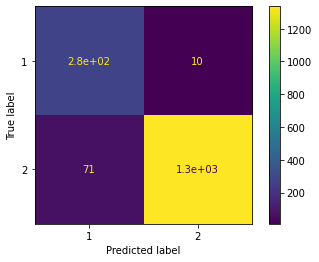

In [98]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels= gs.classes_)
disp.plot();

In [99]:
NewX_new = np.concatenate([X_train_s, X_train_cat_new], axis=1)

In [100]:
NewX_new

array([[2.910e+04, 6.000e+01, 1.399e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.350e+03, 3.600e+01, 1.299e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.525e+04, 3.600e+01, 1.253e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.000e+04, 3.600e+01, 1.136e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+03, 6.000e+01, 1.799e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.250e+04, 3.600e+01, 6.540e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [101]:
pd.DataFrame(NewX_new)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
0,29100.0,60.0,13.99,450.73,52872.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2350.0,36.0,12.99,79.17,36000.0,96.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15250.0,36.0,12.53,510.37,52000.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6000.0,60.0,10.99,130.43,53640.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6000.0,60.0,10.37,128.58,24000.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5070,10000.0,36.0,11.71,330.76,48000.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5071,2500.0,60.0,12.98,56.86,70000.0,109.22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5072,20000.0,36.0,11.36,658.23,65000.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5073,5000.0,60.0,17.99,126.94,40000.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


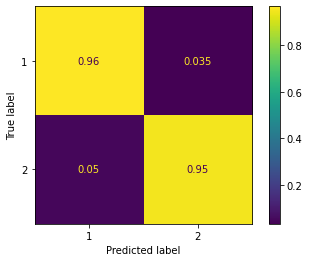

In [102]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm_norm, display_labels= gs.classes_)
disp.plot();

## RUNNING ENSEMBLE TO RUN MULTIPLE CLASSIFERS

In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [104]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [105]:
vc = VotingClassifier([
    ('lr', LogisticRegression(max_iter = 1000)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier())
])

In [106]:
vc.fit(X_final_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',...
                              DecisionTreeCl

In [107]:
vc.score(X_final_test, y_test)

0.9131205673758865

In [108]:
preds = vc.predict(X_final_test)

In [109]:
from sklearn.metrics import balanced_accuracy_score, recall_score, precision_score, f1_score

In [110]:
balanced_accuracy_score(y_test, preds)

0.8470317585007294

In [111]:
from sklearn.metrics import plot_confusion_matrix

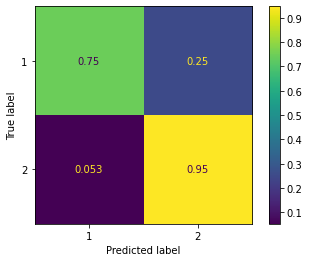

In [112]:
plot_confusion_matrix(vc, X_final_test, y_test, normalize='true');

In [113]:
recall_score(y_test, preds, average='weighted')

0.9131205673758865

In [114]:
precision_score(y_test, preds, average='weighted')

0.913491373431533

In [115]:
f1_score(y_test, preds, average='weighted')

0.9133016400226246

## SOFT VOTING

In [116]:
vc_soft = VotingClassifier([
    ('lr', LogisticRegression(max_iter=1000)), 
    ('dt', DecisionTreeClassifier()), 
    ('knn', KNeighborsClassifier())
], voting='soft')

In [117]:
vc_soft.fit(X_final_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=1000,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [118]:
vc_soft.score(X_final_test, y_test)

0.9190307328605201

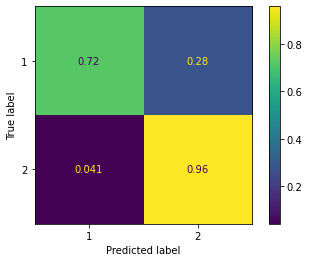

In [119]:
plot_confusion_matrix(vc_soft, X_final_test, y_test, normalize='true');

In [120]:
preds2 = vc_soft.predict(X_final_test)

In [121]:
balanced_accuracy_score(y_test, preds2)

0.8393932592675719

In [122]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [123]:
# rf = RandomForestClassifier(class_weight = {1:1, 2:3})

In [124]:
rf = RandomForestClassifier(class_weight = 'balanced')

In [125]:
rf.fit(X_final_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
rf.score(X_final_test, y_test)

0.9355791962174941

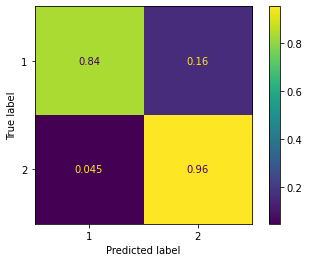

In [127]:
plot_confusion_matrix(rf, X_final_test, y_test, normalize='true');

In [128]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [129]:
y_test.value_counts(normalize=True)

2    0.83156
1    0.16844
Name: status_of_loans, dtype: float64

In [130]:
#X_train_s = pd.DataFrame(X_train_s)

In [131]:
#X_train_s

In [132]:
#NewX_new = pd.concat([X_train_s, X_train_cat_new], axis=1)

In [133]:
#NewX_new.shape

In [134]:
#X1 = loan_new[['loan_amnt', 'life_new', 'interest_rate_new', 'installment', 'annual_inc']]

In [135]:
#X2 = loan_new[['grade']]

In [136]:
#X2

In [137]:
#y

In [138]:
#ohe.fit(X2, y)

In [139]:
#X2_cats = ohe.transform(X2, y)

In [140]:
#X2_cats.head()

In [141]:
#NewX = pd.concat([X1, X2_cats], axis=1)

In [142]:
#NewX.shape

In [143]:
#ss = StandardScaler()

In [144]:
#X1_s = ss.fit_transform(X1)

In [145]:
#X1_s

In [146]:
#NewX = pd.concat([X1_s, X2_cats], axis=1)

In [147]:
#X1_new_s = pd.DataFrame(X1_s)

In [148]:
#NewX = pd.concat([X1_new_s, X2_cats], axis=1)

In [149]:
#NewX.shape

In [150]:
#NewX